In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
cancer.data.shape

(569, 30)

In [3]:
import pandas as pd
import numpy as np
{n : v for n ,v in zip(cancer.target_names,np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

X.shape: (26, 2)


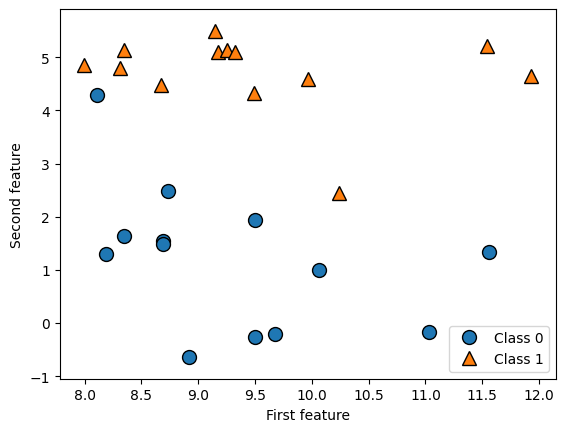

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

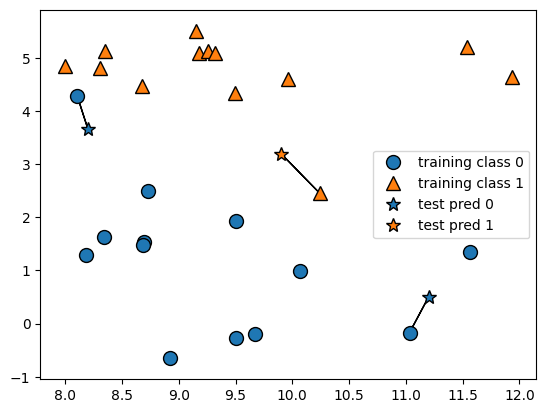

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

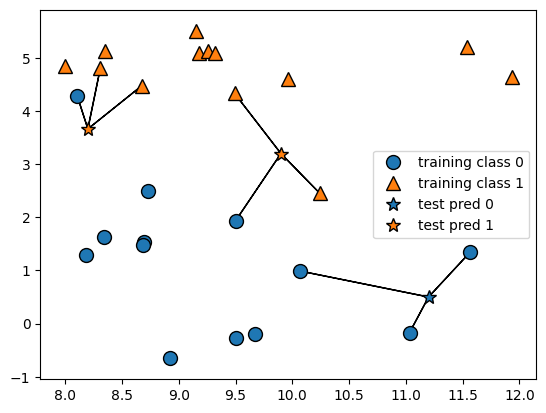

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

# knn using scikit learn

In [8]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors =3)


In [10]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [12]:
print("Test set accuracy : {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy : 0.86


# analyzing the KNN


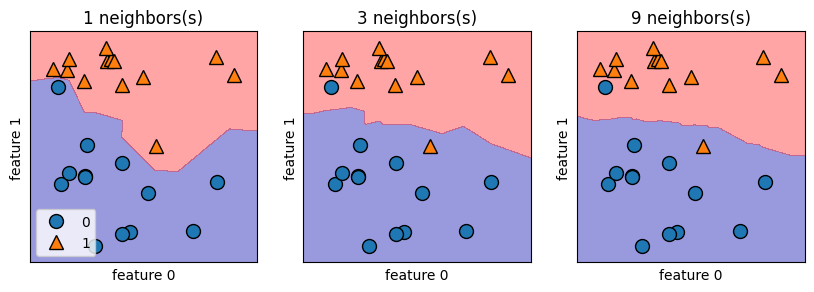

In [13]:
fig,axes = plt.subplots(1,3,figsize =(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps = 0.5,ax=ax ,alpha = .4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax = ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

# Breast Cancer 

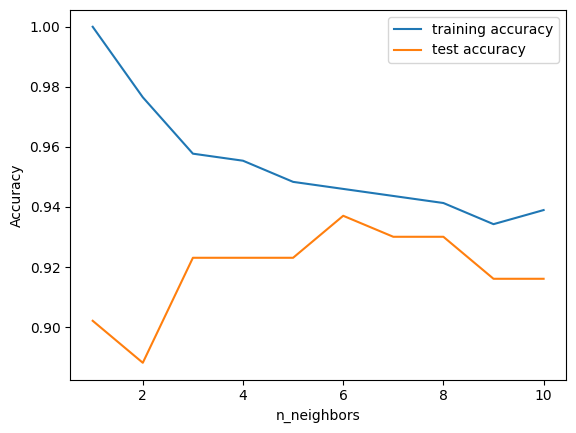

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings =range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    clf  = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy 
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy 
    test_accuracy.append(clf.score(X_test,y_test))


plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

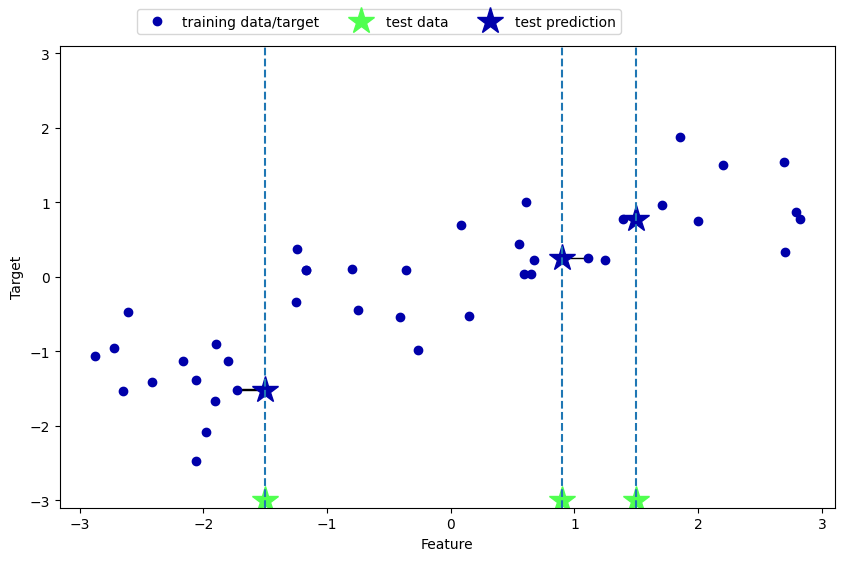

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

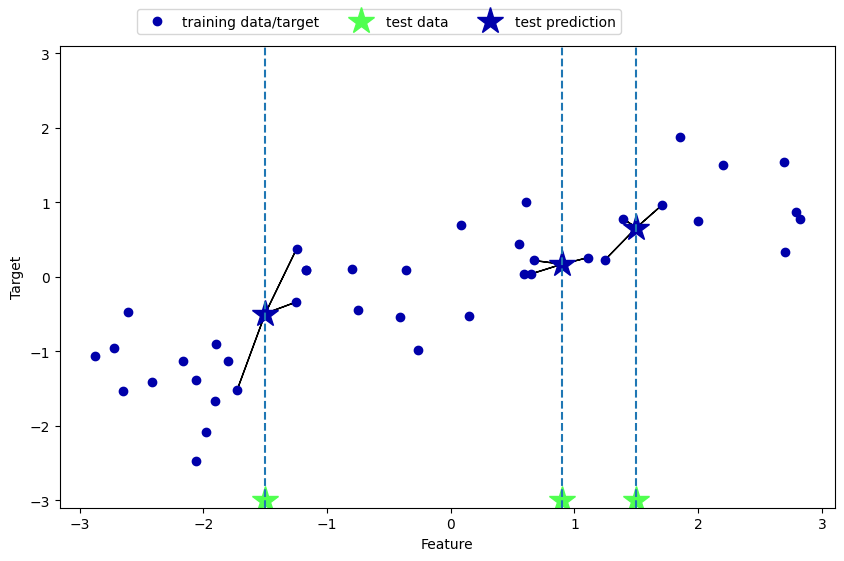

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#split the wave datast into a training and a test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#instantiate the model and set the number of neighbors to consider to 3 
reg = KNeighborsRegressor(n_neighbors=3)
#fit the modle using the training data and training targest 
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [18]:
print("Test set prediction :\n{}".format(reg.predict(X_test)))

Test set prediction :
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [19]:
print("Test set R^2 : {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2 : 0.83


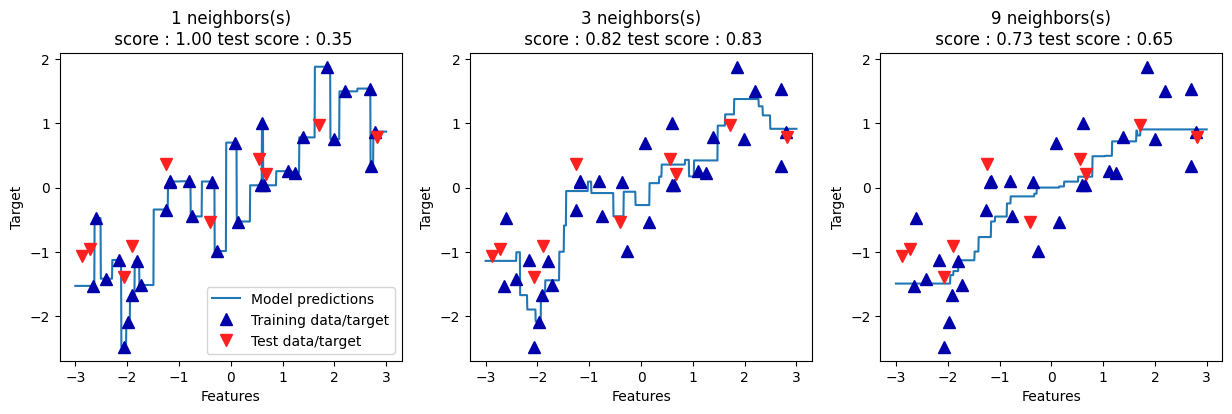

In [20]:
fig , axes = plt.subplots(1,3,figsize = (15,4))
# create 1000 data points , evenly spaced between -3 and 3 

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    # make predictions using 1,3 or 9 neigbhors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize = 8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize = 8)

    ax.set_title("{} neighbors(s)\n score : {:.2f} test score : {:.2f}".format(n_neighbors,reg.score(X_train,y_train),
                                                                               reg.score(X_test,y_test)))
    ax.set_xlabel("Features")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions","Training data/target","Test data/target"],loc="best")

w[0]: 0.393906  b: -0.031804


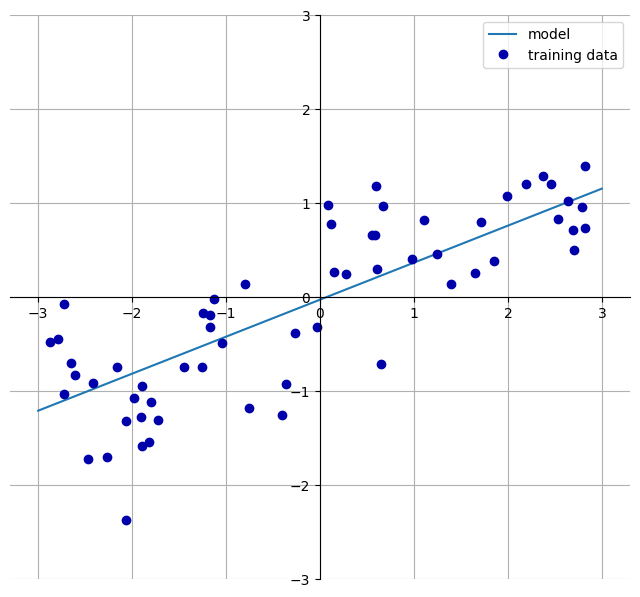

In [21]:
mglearn.plots.plot_linear_regression_wave()